## Pre-analysis of Abalone Project 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#plot style/can be changed
plt.rcParams["figure.dpi"] = 120
sns.set_context("notebook")

DATA_PATH = r"C:\Users\U436576\OneDrive - Danfoss\Desktop\DTU\abalone\abalone.data"
COL_NAMES = [
    "Sex","Length","Diameter","Height",
    "WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings"
]

abalone = pd.read_csv(DATA_PATH, header=None, names=COL_NAMES)

# making sure that sex is categorical and numerics are parsed as numbers
abalone["Sex"] = abalone["Sex"].astype("category")
numeric_cols = ["Length","Diameter","Height","WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings"]
abalone[numeric_cols] = abalone[numeric_cols].apply(pd.to_numeric, errors="coerce")
# Make Rings nullable integer (keeps NaN if any)
abalone["Rings"] = abalone["Rings"].astype("Int64")

# Adding the rings as a Years variable
abalone["AgeYears"] = abalone["Rings"].astype("float") + 1.5


print("Shape:", abalone.shape)
print("\nHead:")
display(abalone.head())

print("\nInfo:")
print(abalone.info())

print("\nDescribe (numeric):")
display(abalone.describe())


num_cols = abalone.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in abalone.columns if c not in num_cols]
print("\nDetected numeric columns:", num_cols)
print("Detected categorical columns:", cat_cols)


attribute_meta = pd.DataFrame([
    {"Attribute":"Sex",           "Role":"Feature", "Type":"Discrete",  "Scale":"Nominal", "Unit":"-",  "Description":"M, F, I (infant)",                   "Categories":"M,F,I"},
    {"Attribute":"Length",        "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"mm", "Description":"Longest shell measurement",          "Categories":""},
    {"Attribute":"Diameter",      "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"mm", "Description":"Perpendicular to length",            "Categories":""},
    {"Attribute":"Height",        "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"mm", "Description":"With meat in shell",                 "Categories":""},
    {"Attribute":"WholeWeight",   "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"g",  "Description":"Whole abalone weight",               "Categories":""},
    {"Attribute":"ShuckedWeight", "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"g",  "Description":"Weight of meat",                      "Categories":""},
    {"Attribute":"VisceraWeight", "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"g",  "Description":"Gut weight (after bleeding)",         "Categories":""},
    {"Attribute":"ShellWeight",   "Role":"Feature", "Type":"Continuous","Scale":"Ratio",   "Unit":"g",  "Description":"Shell weight after being dried",      "Categories":""},
    {"Attribute":"Rings",         "Role":"Target",  "Type":"Discrete",  "Scale":"Ratio",   "Unit":"-",  "Description":"+1.5 gives the age in years (proxy)", "Categories":""},
])
display(attribute_meta)


Shape: (4177, 10)

Head:


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,AgeYears
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sex            4177 non-null   category
 1   Length         4177 non-null   float64 
 2   Diameter       4177 non-null   float64 
 3   Height         4177 non-null   float64 
 4   WholeWeight    4177 non-null   float64 
 5   ShuckedWeight  4177 non-null   float64 
 6   VisceraWeight  4177 non-null   float64 
 7   ShellWeight    4177 non-null   float64 
 8   Rings          4177 non-null   Int64   
 9   AgeYears       4177 non-null   float64 
dtypes: Int64(1), category(1), float64(8)
memory usage: 302.1 KB
None

Describe (numeric):


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,AgeYears
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.0,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.0,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.0,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.0,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.0,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.0,30.500000



Detected numeric columns: ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings', 'AgeYears']
Detected categorical columns: ['Sex']


,Attribute,Role,Type,Scale,Unit,Description,Categories
0,Sex,Feature,Discrete,Nominal,-,"M, F, I (infant)","M,F,I"
1,Length,Feature,Continuous,Ratio,mm,Longest shell measurement,
2,Diameter,Feature,Continuous,Ratio,mm,Perpendicular to length,
3,Height,Feature,Continuous,Ratio,mm,With meat in shell,
4,WholeWeight,Feature,Continuous,Ratio,g,Whole abalone weight,
5,ShuckedWeight,Feature,Continuous,Ratio,g,Weight of meat,
6,VisceraWeight,Feature,Continuous,Ratio,g,Gut weight (after bleeding),
7,ShellWeight,Feature,Continuous,Ratio,g,Shell weight after being dried,
8,Rings,Target,Discrete,Ratio,-,+1.5 gives the age in years (proxy),


#### check for unique values in Sex

In [7]:
print("Unique values in Sex:", abalone["Sex"].unique())
print("\nCategory counts (Sex):")
display(abalone['Sex'].value_counts())

Unique values in Sex: ['M', 'F', 'I']
Categories (3, object): ['F', 'I', 'M']

Category counts (Sex):


Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

### Attribute Analysis

In [ ]:
summary_all = abalone[num_cols].describe().T
summary_all["skew"] = abalone[num_cols].skew()
summary_all["kurtosis"] = abalone[num_cols].kurt()
display(summary_all)

# Grouped by sex
summary_by_sex = abalone.groupby("Sex")[num_cols].agg(["count","mean","std","min","median","max"])
display(summary_by_sex)


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Length,4177.0,0.523992,0.120093,0.075,0.45,0.545,0.615,0.815,-0.639873,0.064621
Diameter,4177.0,0.407881,0.09924,0.055,0.35,0.425,0.48,0.65,-0.609198,-0.045476
Height,4177.0,0.139516,0.041827,0.0,0.115,0.14,0.165,1.13,3.128817,76.025509
WholeWeight,4177.0,0.828742,0.490389,0.002,0.4415,0.7995,1.153,2.8255,0.530959,-0.023644
ShuckedWeight,4177.0,0.359367,0.221963,0.001,0.186,0.336,0.502,1.488,0.719098,0.595124
VisceraWeight,4177.0,0.180594,0.109614,0.0005,0.0935,0.171,0.253,0.76,0.591852,0.084012
ShellWeight,4177.0,0.238831,0.139203,0.0015,0.13,0.234,0.329,1.005,0.620927,0.531926
Rings,4177.0,9.933684,3.224169,1.0,8.0,9.0,11.0,29.0,1.114102,2.330687
AgeYears,4177.0,11.433684,3.224169,2.5,9.5,10.5,12.5,30.5,1.114102,2.330687


C:\Users\U436576\AppData\Local\Temp\ipykernel_24216\2668976837.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_by_sex = abalone.groupby("Sex")[num_cols].agg(["count","mean","std","min","median","max"])


Length                                          Diameter            \
     count      mean       std    min median    max    count      mean   
Sex                                                                      
F     1307  0.579093  0.086160  0.275  0.590  0.815     1307  0.454732   
I     1342  0.427746  0.108858  0.075  0.435  0.725     1342  0.326494   
M     1528  0.561391  0.102697  0.155  0.580  0.780     1528  0.439287   

                      ...     Rings                AgeYears             \
          std    min  ...       std min median max    count       mean   
Sex                   ...                                                
F    0.070954  0.195  ...  3.104256   5   10.0  29     1307  12.629304   
I    0.088109  0.055  ...  2.511554   1    8.0  21     1342   9.390462   
M    0.084398  0.110  ...  3.026349   3   10.0  27     1528  12.205497   

                                 
          std  min median   max  
Sex                              
F    3.104256  6.5   11.5  30.5  
I    2.511554  2.5    9.5  22.5  
M    3.026349  4.5   11.5  28.5  

[3 rows x 54 columns]

### Pre-check for outliers - pre sanity checks and more distributions

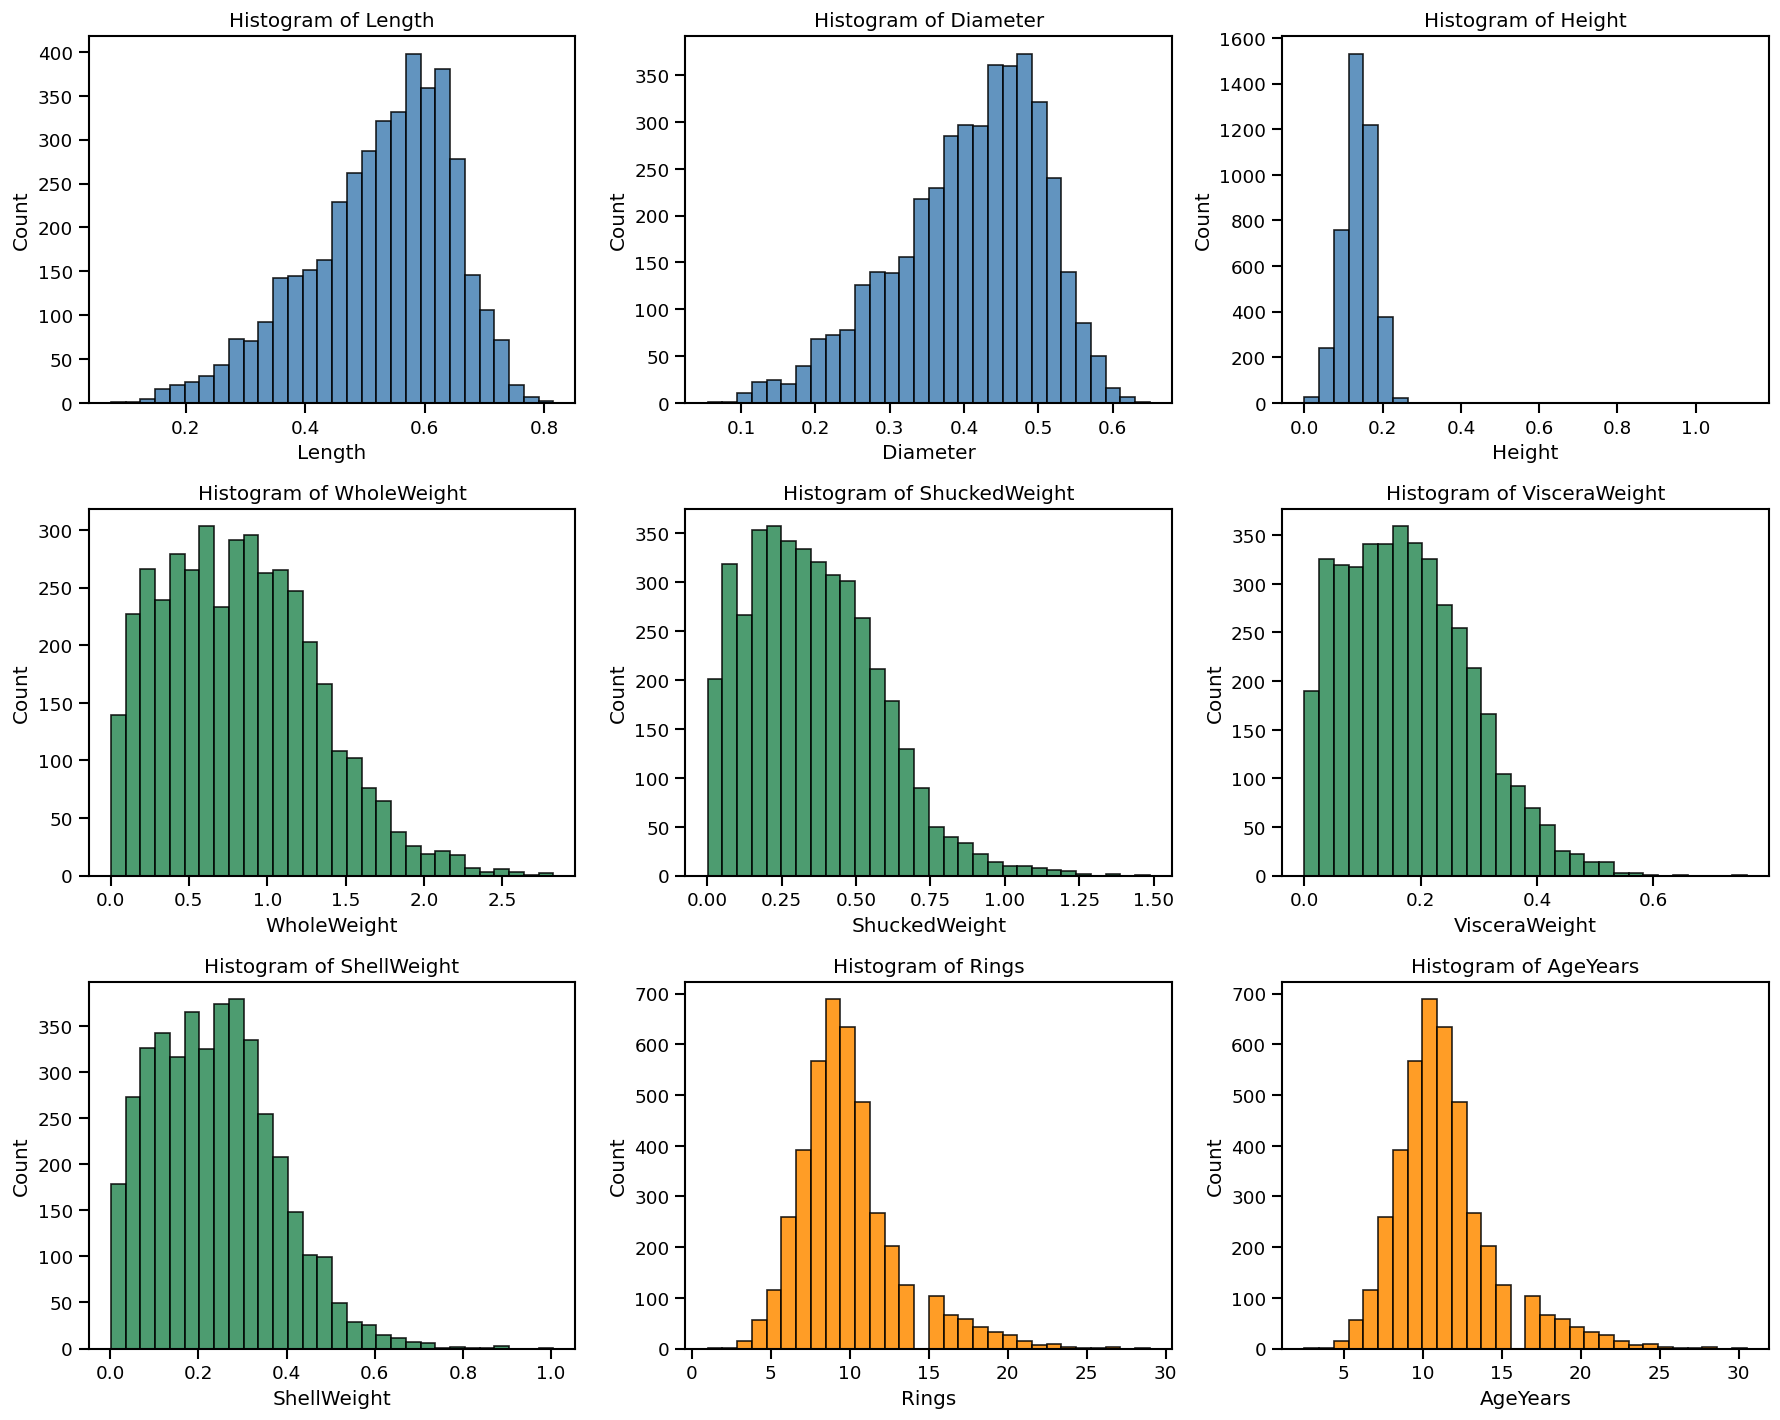

<Figure size 768x576 with 0 Axes>

In [ ]:
size_cols = ["Length", "Diameter", "Height"]
weight_cols = ["WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight"]
age_cols = ["Rings", "AgeYears"]

colors = {}
for c in size_cols:
    colors[c] = "steelblue"
for c in weight_cols:
    colors[c] = "seagreen"
for c in age_cols:
    colors[c] = "darkorange"

cols = size_cols + weight_cols + age_cols
n = len(cols)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, c in enumerate(cols):
    axes[i].hist(abalone[c], bins=30, color=colors[c], edgecolor="black", alpha=0.85)
    axes[i].set_title(f"Histogram of {c}")
    axes[i].set_xlabel(c)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

fig = plt.gcf()                          
fig.tight_layout()
fig.savefig("figs/hist.png", dpi=300, bbox_inches="tight")   
fig.savefig("figs/hist.pdf", bbox_inches="tight")




In [ ]:
def sanity_checks(df):
    checks = {
        # physically impossible
        "Height <= 0": df["Height"] <= 0,
        "Length <= 0": df["Length"] <= 0,
        "Diameter <= 0": df["Diameter"] <= 0,
        "AnyWeight <= 0": (
            (df["WholeWeight"] <= 0) |
            (df["ShuckedWeight"] <= 0) |
            (df["VisceraWeight"] <= 0) |
            (df["ShellWeight"] <= 0)
        ),
        "Rings <= 0": df["Rings"] <= 0,

        # geometric consistency
        "Diameter > Length": df["Diameter"] > df["Length"],
        "Height > Length": df["Height"] > df["Length"],
        "Height > Diameter": df["Height"] > df["Diameter"],
    }

    rows = []
    for name, mask in checks.items():
        rows.append({
            "Check": name,
            "Count": int(mask.sum()),
            "Percent": 100 * float(mask.mean())
        })
    summary = pd.DataFrame(rows).sort_values("Count", ascending=False).reset_index(drop=True)

    examples = {}
    for name, mask in checks.items():
        idx = df.index[mask]
        examples[name] = df.loc[idx, ["Sex","Length","Diameter","Height",
                                      "WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings"]].head(10)

    return summary, examples

sanity_summary, sanity_examples = sanity_checks(abalone)
display(sanity_summary)


height_le_zero = sanity_examples["Height <= 0"]
print(f"\nRows where Height <= 0: {len(height_le_zero)} (showing up to 10)")
display(height_le_zero)


,Check,Count,Percent
0,Height <= 0,2,0.047881
1,Height > Diameter,1,0.023941
2,Height > Length,1,0.023941
3,Diameter > Length,1,0.023941
4,AnyWeight <= 0,0,0.000000
5,Diameter <= 0,0,0.000000
6,Length <= 0,0,0.000000
7,Rings <= 0,0,0.000000



Rows where Height <= 0: 2 (showing up to 10)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


### Investigation to check correlation with Maturity

In [17]:
import os, matplotlib.pyplot as plt

os.makedirs("figs", exist_ok=True)

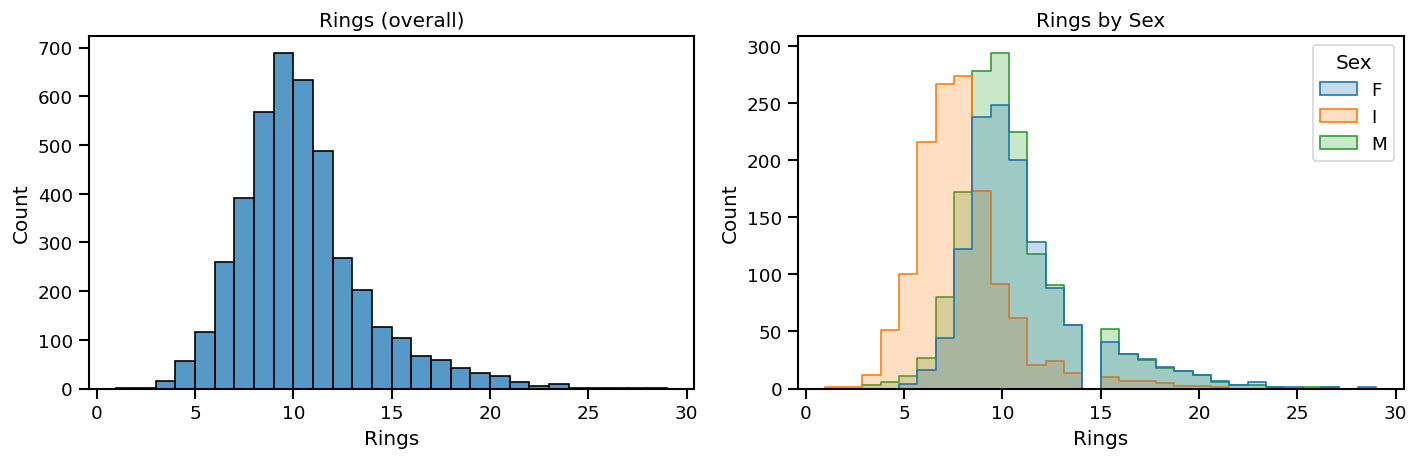

<Figure size 768x576 with 0 Axes>

In [ ]:
#ring distribution
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(abalone["Rings"], bins=range(int(abalone["Rings"].min()), int(abalone["Rings"].max())+1), ax=ax[0])
ax[0].set_title("Rings (overall)"); ax[0].set_xlabel("Rings"); ax[0].set_ylabel("Count")

sns.histplot(data=abalone, x="Rings", hue="Sex", element="step", stat="count", common_norm=False, bins=30, ax=ax[1])
ax[1].set_title("Rings by Sex"); ax[1].set_xlabel("Rings"); ax[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

fig = plt.gcf()                          
fig.tight_layout()
fig.savefig("figs/rings_hist.png", dpi=300, bbox_inches="tight")   
fig.savefig("figs/rings_hist.pdf", bbox_inches="tight")



Correlation of Rings (infants) with numeric attributes:


Rings            1.000000
AgeYears         1.000000
ShellWeight      0.725436
Height           0.720035
WholeWeight      0.696327
Diameter         0.695078
Length           0.685997
VisceraWeight    0.673273
ShuckedWeight    0.620246
Name: Rings, dtype: float64


Correlation of WholeWeight (infants) with numeric attributes:


WholeWeight      1.000000
VisceraWeight    0.973067
ShuckedWeight    0.969598
ShellWeight      0.966964
Diameter         0.923699
Length           0.920999
Height           0.891677
Rings            0.696327
AgeYears         0.696327
Name: WholeWeight, dtype: float64

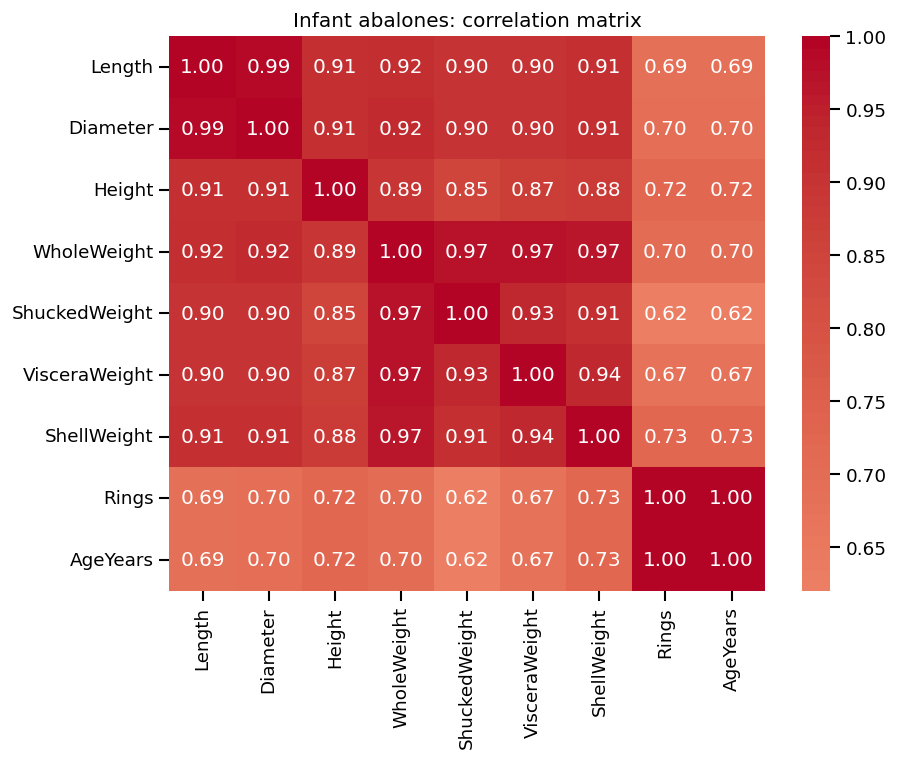

<Figure size 768x576 with 0 Axes>

In [ ]:
infants = abalone[abalone["Sex"] == "I"]

corr_with_rings = infants.corr(numeric_only=True)["Rings"].sort_values(ascending=False)


corr_with_weight = infants.corr(numeric_only=True)["WholeWeight"].sort_values(ascending=False)

print("Correlation of Rings (infants) with numeric attributes:")
display(corr_with_rings)

print("\nCorrelation of WholeWeight (infants) with numeric attributes:")
display(corr_with_weight)

plt.figure(figsize=(8,6))
sns.heatmap(infants[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Infant abalones: correlation matrix")
plt.show()

fig = plt.gcf()                           
fig.tight_layout()
fig.savefig("fig.infants.png", dpi=300, bbox_inches="tight")  

fig.savefig("figs/infants.pdf", bbox_inches="tight")



Size distribution per Sex

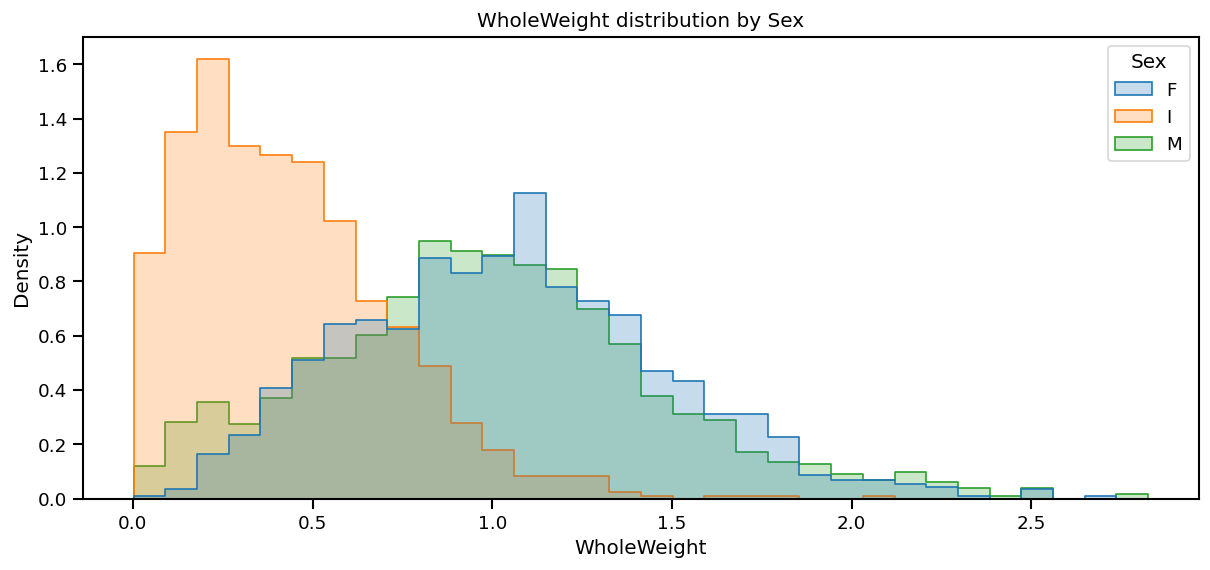

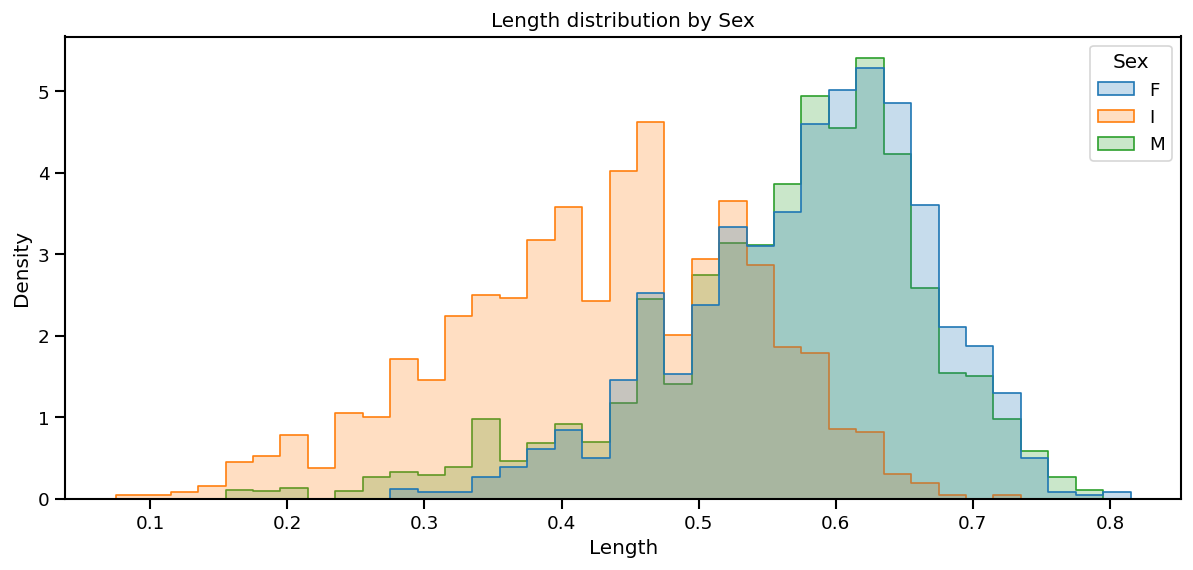

<Figure size 768x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data=abalone, x="WholeWeight", hue="Sex", element="step", stat="density", common_norm=False)
plt.title("WholeWeight distribution by Sex")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(data=abalone, x="Length", hue="Sex", element="step", stat="density", common_norm=False)
plt.title("Length distribution by Sex")
plt.show()

fig = plt.gcf()                           
fig.tight_layout()
fig.savefig("figs/size_hist.png", dpi=300, bbox_inches="tight")
fig.savefig("figs/size_hist.pdf", bbox_inches="tight")



#### Mean size per Sex

In [15]:
abalone.groupby("Sex")[["Length","Diameter","Height","WholeWeight"]].describe().T

C:\Users\U436576\AppData\Local\Temp\ipykernel_24216\1811814418.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abalone.groupby("Sex")[["Length","Diameter","Height","WholeWeight"]].describe().T


Sex                          F            I            M
Length      count  1307.000000  1342.000000  1528.000000
            mean      0.579093     0.427746     0.561391
            std       0.086160     0.108858     0.102697
            min       0.275000     0.075000     0.155000
            25%       0.525000     0.360000     0.505000
            50%       0.590000     0.435000     0.580000
            75%       0.640000     0.510000     0.630000
            max       0.815000     0.725000     0.780000
Diameter    count  1307.000000  1342.000000  1528.000000
            mean      0.454732     0.326494     0.439287
            std       0.070954     0.088109     0.084398
            min       0.195000     0.055000     0.110000
            25%       0.410000     0.270000     0.395000
            50%       0.465000     0.335000     0.455000
            75%       0.505000     0.390000     0.500000
            max       0.650000     0.550000     0.630000
Height      count  1307.000000  1342.000000  1528.000000
            mean      0.158011     0.107996     0.151381
            std       0.039984     0.031995     0.034804
            min       0.015000     0.000000     0.025000
            25%       0.140000     0.085000     0.130000
            50%       0.160000     0.110000     0.155000
            75%       0.175000     0.130000     0.175000
            max       1.130000     0.220000     0.515000
WholeWeight count  1307.000000  1342.000000  1528.000000
            mean      1.046532     0.431363     0.991459
            std       0.430316     0.286275     0.470581
            min       0.080000     0.002000     0.015500
            25%       0.730000     0.205500     0.671625
            50%       1.038500     0.384000     0.975750
            75%       1.320250     0.599375     1.265625
            max       2.657000     2.049500     2.825500

### Boxplot to visualize better

C:\Users\U436576\AppData\Local\Temp\ipykernel_24216\625816213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=abalone, x="Sex", y=attr, ax=axes[i], palette="Set2")
C:\Users\U436576\AppData\Local\Temp\ipykernel_24216\625816213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=abalone, x="Sex", y=attr, ax=axes[i], palette="Set2")


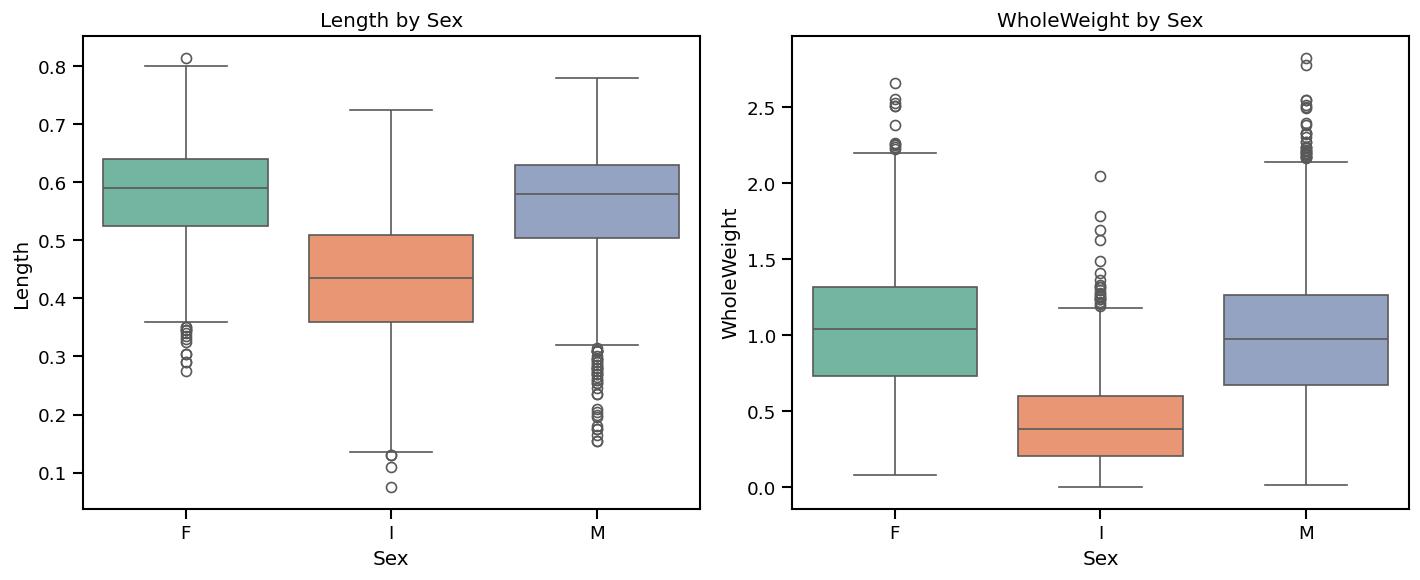

<Figure size 768x576 with 0 Axes>

In [ ]:
attrs = ["Length", "WholeWeight"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, attr in enumerate(attrs):
    sns.boxplot(data=abalone, x="Sex", y=attr, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{attr} by Sex")
    axes[i].set_xlabel("Sex")
    axes[i].set_ylabel(attr)

plt.tight_layout()
plt.show()

fig = plt.gcf()
fig.tight_layout()
fig.savefig("figs/box_size.png", dpi=300, bbox_inches="tight")
fig.savefig("figs/box_size.pdf", bbox_inches="tight")


### IQR

In [12]:
def iqr_outlier_flags(df, cols):
    flags = {}
    for c in cols:
        q1, q3 = df[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        lo = q1 - 1.5*iqr
        hi = q3 + 1.5*iqr
        flags[c] = ((df[c] < lo) | (df[c] > hi))
    return pd.DataFrame(flags)

out_flags = iqr_outlier_flags(abalone, num_cols)
outlier_summary = out_flags.sum().sort_values(ascending=False).to_frame("n_outliers")
display(outlier_summary)


any_outlier_idx = out_flags.any(axis=1)
print(f"Rows flagged as outlier in >=1 attribute: {any_outlier_idx.sum()}")
display(abalone.loc[any_outlier_idx].head(10))


,n_outliers
Rings,278
AgeYears,278
Diameter,59
Length,49
ShuckedWeight,48
ShellWeight,35
WholeWeight,30
Height,29
VisceraWeight,26


Rows flagged as outlier in >=1 attribute: 396


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,AgeYears
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,20.5
32,M,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,18,19.5
33,F,0.680,0.550,0.175,1.7980,0.8150,0.3925,0.455,19,20.5
36,F,0.540,0.475,0.155,1.2170,0.5305,0.3075,0.340,16,17.5
43,I,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.012,5,6.5
44,I,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.015,4,5.5
72,F,0.595,0.475,0.170,1.2470,0.4800,0.2250,0.425,20,21.5
81,M,0.620,0.510,0.175,1.6150,0.5105,0.1920,0.675,12,13.5


### Data issue plan (not executed... played around with chatgpt to check what could be done later on)

In [ ]:
issues = []

# Impossible values
imp_rows = (abalone["Height"] <= 0) | (abalone["Length"] <= 0) | (abalone["Diameter"] <= 0) | (abalone["Rings"] <= 0)
if imp_rows.any():
    issues.append(f"Found {imp_rows.sum()} rows with impossible measurements (Height/Length/Diameter/Rings <= 0).")

# Negative or zero weights
w_cols = ["WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight"]
w_bad = (abalone[w_cols] <= 0).any(axis=1)
if w_bad.any():
    issues.append(f"Found {w_bad.sum()} rows with non-positive weights.")

# Height > Length or > Diameter (soft)
soft = (abalone["Height"] > abalone["Length"]) | (abalone["Height"] > abalone["Diameter"]) | (abalone["Diameter"] > abalone["Length"])
if soft.any():
    issues.append(f"Found {soft.sum()} rows violating simple geometric soft-rules (inspect, but not auto-drop).")

# Outlier count
issues.append(f"{out_flags.any(axis=1).sum()} rows flagged as potential outliers by IQR in ≥1 attribute.")

print("Data issues summary:")
for it in issues:
    print(" -", it)
